## Linear Classifiers: SVM and Logisitic Regression

### Logistic Regression
1. It is a linear model.  **WHY??**
    - **Possible Ans**
        - In logistic regression, we can have a linear relationship between inputs(X and w) and output(label)
        - raw_model_output(z) = `w0+ w1*x1 + w2*x2 + ...`, if this z > 0 then we can say label =1 otherwise 0
            - This is a linear relationship
            - This represents Decision Boundary, actual classification is done using decision boundary only
        - **But we have non-linearity when we apply sigmoid function**
            - `Hypothesis = sigmoid(z) = Probability(y=1; x,w)`
            - This sigmoid is applied to bring the raw_model_output(z) in range(0,1) so that it can represent probability. This is just a transformational step. 
            - We can deduce label using raw_model_output(z), which represents **Decision Boundary**. Classifiers predict output using Decision Boundary only. 
        - `From above arguements we can say, Logistic Regression is Linear Classifier, last non-linear step is just for transformational purpose`
2. It can give classification confidence over the class labels
    - Method: `model.predict_proba(x_test)`
3. **Effect of Regularization(Regz) on Logistic Regression**
    - Regularization reduces confidence( Confidence = Probability)
        - With RegZ probabilities becomes close to 0.5   
        - `RegZ => Small Parameter => Small raw_model_output(z close to 0) => Sigmoid(z) close to 0.5 => Probability close to 0.5`
        - This happens from both sides when z > 0 and z < 0
    - Regularization changes the orientation of Decision Boundary 
        - `RegZ ==> Small Parameter ==> Parameters define the orientation of Boundary`
        
        

### Support Vector Machine
`from sklearn.svm import LinearSVC, SVC`
1. LinearSVC 
    - Linear support vector classifier 
2. SVC
    - Non linear support vector classifier 

### Underfitting
1. If model is too simple, then it is not able to learn underlying patterns in data.
2. Train and Test accuracy both are low

### Overfitting
1. If model is too complex, then it starts to learn the pecularities of that specific train set
    - It means it starts learning the minute details of train set and take these details into account while making the predictions. 
    - There is very high chance these minute details are not present in new data and thus it starts predicting incorrectly for new data because it is taking into account the presence/absence of those minute details
    - That's how overfitting reduces performance
    - These minute details/pecularities are also called noise.
2. **Causes of Overfitting**
    - **Too many features/Parameters**
        - A model having too many parameters(theta's) it means it has many features corresponding to Parameters
        - When we have many features, there is a possibility that a feature is included who's weight/parameter is very high, this features fits very heavily and this feature doesn't capture any general pattern, it captures some very specific detail. This causes overfitting 
        - Having too many features increases chances of above said features included in the feature set. 
        - **Solution**
            - Careful feature selection 
            - Regularization 

### Linear Classifiers
1. That learns a linear decision boundary
    - Decision Boundary: Surface that separates different classes 

In [1]:
import numpy as np

# Plot the decision boundary of different classifiers
def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler

In [3]:
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target
print(iris_data.shape, iris_target.shape)

(150, 4) (150,)


In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tSNE_visualization(samples, labels, species, learning_rate=100, annotate=False):
    model = TSNE(learning_rate=100)
    tsne_features = model.fit_transform(samples)
    if annotate is True:
        plt.figure(figsize=(10,7))
    plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
#     To annotate the points
    if annotate is True:
        for x,y,category in zip(tsne_features[:,0], tsne_features[:,1], species):
            plt.annotate(category,(x,y), c='r', fontsize=10)
    plt.show()
    return tsne_features

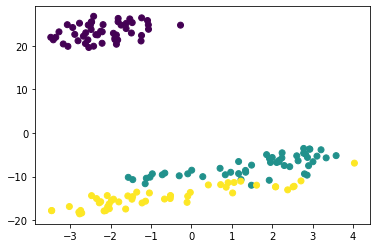

In [5]:
scale_data = StandardScaler().fit_transform(iris_data)
tsne_features = tSNE_visualization(iris_data, iris_target, None, learning_rate=200)

In [6]:
print(tsne_features.shape, iris_target.shape)

(150, 2) (150,)


In [7]:
classifiers = [LogisticRegression(), KNeighborsClassifier(), LinearSVC(), SVC()]
for clf in classifiers:
    clf.fit(tsne_features, iris_target)

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


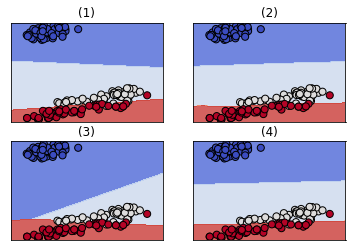

In [8]:
plot_4_classifiers(tsne_features, iris_target, classifiers)

In [9]:
wines  = datasets.load_wine()

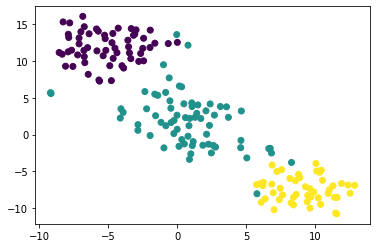

In [10]:
samples, labels = wines.data, wines.target
samples = StandardScaler().fit_transform(samples)
wine_features = tSNE_visualization(samples, labels, None, learning_rate=200)

In [11]:
classifiers = [LogisticRegression(), KNeighborsClassifier(), LinearSVC(), SVC()]
for clf in classifiers:
    clf.fit(wine_features, labels)

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


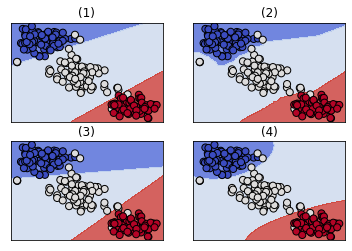

In [12]:
plot_4_classifiers(wine_features, labels, classifiers)

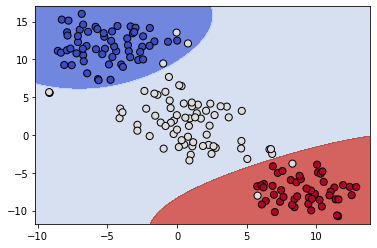

In [13]:
plot_classifier(wine_features, labels, classifiers[3])

In [14]:
from scipy.optimize import minimize

In [15]:
# minimize()

### General Points
1. Dot Product of x and y
    - `x*y` or `x@y` 

### Loss/Cost Functions
1. Model training tries to minimize the loss 
2. `.fit()` method make use of loss function. 
3. `.score()` gives us *score* which may/may not be same as *loss*.

#### Squared Loss Function 
1.  `loss = Summation[ (y_true - y_predict)**2 ]`

#### 0/1 Loss 
1. Loss = No. of incorrect prediction 
2. **Hard to minimize** WHY ??

#### Log Loss
1. `Loss = log(1 + exp(-z)) = -log(1/(1 +exp(-z)))`
#### Hing Loss
2. `Loss = max(0, 1 - z)`

#### Minimizing any loss or function 
1. Code
    - `from scipy.optimize import minimize`
    - result = minimize(fun, x0) 
        - fun: function to be minimized
        - x0: Initial guess of weights,
        - result.x : final weights at which function is minimum

In [16]:
## Draw Plot of Squared Error 

In [17]:
# Log loss and hinge loss
points = np.linspace(-2, 2, 1000)
print(points.shape)

(1000,)


In [18]:
def log_loss(z):
    return np.log(1 + np.exp(-z))
def hinge_loss(z):
    return np.maximum(0, 1-z)

In [19]:
plt.style.use('ggplot')

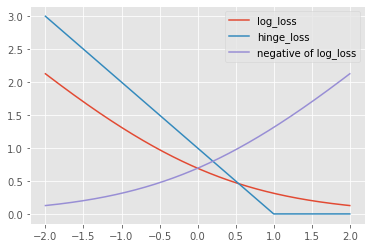

In [20]:
hingeL = hinge_loss(points)
logL = log_loss(points)
nlogL = log_loss(-1*points)
plt.figure()
plt.plot(points, logL, label='log_loss')
plt.plot(points, hingeL, label='hinge_loss')
plt.plot(points, nlogL, label='negative of log_loss')
plt.legend()
plt.show()

## Logistic Regression 
1. Code
    - `from sklearn.linear_model import LogisticRegression`
    - `lr  = LogisticRegression()`
2. Coefficients and intercepts 
    - `lr.coef_`: (w1,w2,...) and `lr.intercept_`: (w0)
3. Mathematics 
    - **raw_model_output** = w@X[0]  = w0 + w1*x1 + w2*x2 + ...
    - Hypothesis = sigmoid(raw_model_output) = P(y=1 | x,W) = Probability
4. Decision Boundary
    - w0 + w1*x1 + w2*x2 + ... = 0 : This equation represents the Decision Boundary
    - Example: `-3 + 1*x1 + 3*x2 = 0` : Line equation
    - Orientation of Boundary depends on *parameters* (w1,w2,w3,...)
    - Shifting depends on *intercept* (w0)
5. Sigmoid/Logistic function
    - It squashes the raw_model_output between (0,1)

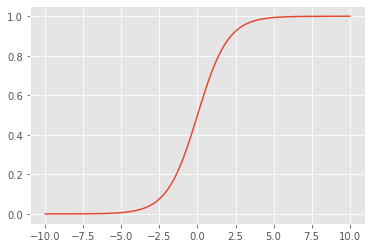

In [21]:
def sigmoid(z):
    return (1/(1 + np.exp(-z)))

xpoints = np.linspace(-10, 10, 1000)
logistic_func = sigmoid(xpoints)
plt.figure()
plt.plot(xpoints, logistic_func)
plt.show()

In [22]:
# here in this loss function we are not adding term for REGULARIZATION
def custom_logistic_loss(w, *data_tup):
    total_loss = 0
    X,y = data_tup
    for x,y in zip(X,y):
        z = w@x
        total_loss += log_loss(z*y)
    return total_loss

In [23]:
from scipy.optimize import minimize

In [24]:
cancer = datasets.load_breast_cancer()

In [25]:
data = cancer.data
data = data[:, 0:10]
data = StandardScaler().fit_transform(data)
target = cancer.target
print(data.shape, target.shape)

(569, 10) (569,)


In [26]:
target[ target == 0] = -1
target[:20]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1])

#### Weights learned from minimize and Logistic Regression are same 

In [27]:
data_tup = (data, target)
initial_guess = data[0]
optimized_result = minimize(custom_logistic_loss, initial_guess, data_tup)
learned_wts = optimized_result.x
print(learned_wts)

[ 1.0358662  -1.6537843   4.08338472 -9.4092387  -1.06786269  0.0789165
 -0.85110192 -2.44103743 -0.45285658  0.43353577]


In [28]:
# C is very high, means No Regularization.
# To compare the coef_ with the above method, C is kept high, because in the above method we didn't add the 
# regularization term in custom loss function
lr = LogisticRegression(fit_intercept=False, C=1000000000, max_iter=2000).fit(data,target)
print(lr.coef_)

[[ 1.03607257 -1.6538047   4.08304617 -9.40914845 -1.06787399  0.07896311
  -0.850997   -2.44109047 -0.45288781  0.43348893]]


## Regularization 
1. **Fights Overfitting** 
    - By penalizing the coefficients(make them smaller)
    - In Logistic Regression, hyperparameter *C* controls regularization.
        - Higher C, less regularized 
        - Lower C, more regularized
2. **Training Accuracy**
    - Regularization brings down the training accuracy 
    - `regularized loss = original loss + large coefficient penalty`
    - Without Regularization, the only goal of loss is to minimize the training accuracy. 
    - With Regularization, goal of loss includes penalizing the coefficients, which diverts it from original loss of minimizing the training accuracy. 
    - That's why training accuracy decreases.
3. **Testing Accuracy** 
    - Regularization improves the training accuracy. 
    - Say we have feature `X1`. Now without regularization this feature fits heavily i.e its coef_ is very high and this features leads to overfitting. We can chose not to use it but that cause loss of information.
    - Using Regularization in above case, provides a trade off btw not using the feature completely or using it heavily. Regularization makes its coef_ smaller and thus making it overfit less.
4. **L1 and L2 regularization** 
    - Both reduces overfitting
    - L1 helps in feature selection by making coef_ of less important features = 0.
    - L2 shrinks the coef_ to smaller values.
5. **Too Much Regularization vs Too little Regularzation**
    - Too much Regulr, causes underfitting, model becomes very smooth and simple. 
    - Less Regulr, causes overfitting 

In [29]:
cancer = datasets.load_breast_cancer()

In [30]:
cancer_data, cancer_target = cancer.data, cancer.target
print(cancer_data.shape, cancer_target.shape)

(569, 30) (569,)


In [31]:
import pandas as pd

In [32]:
cancerDf = pd.DataFrame(cancer_data, columns=cancer.feature_names)
cancerDf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
cancerDf.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_target, test_size=0.2, stratify=cancer_target)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [36]:
scaler = StandardScaler()

In [37]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
lr_weak_reg = LogisticRegression(C=100)
lr_strong_reg = LogisticRegression(C=1)

In [40]:
lr_weak_reg.fit(X_train, y_train)
lr_strong_reg.fit(X_train, y_train)

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Training Accuracy
print(lr_weak_reg.score(X_train, y_train))
print(lr_strong_reg.score(X_train, y_train))

0.9934065934065934
0.9912087912087912


In [42]:
# Testing Accuracy
print(lr_weak_reg.score(X_test, y_test))
print(lr_strong_reg.score(X_test, y_test))

0.9210526315789473
0.9736842105263158


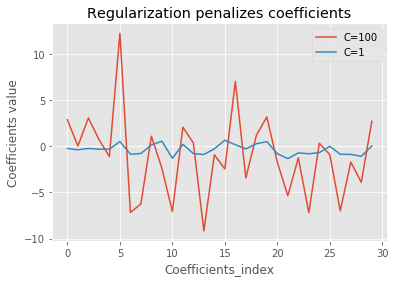

In [43]:
## Regularization: Penalizes the coefficients
plt.figure()
# plt.plot([0,30], [0,0], 'k--')
plt.plot(lr_weak_reg.coef_.flatten(), label='C=100')
plt.plot(lr_strong_reg.coef_.flatten(), label='C=1')
plt.xlabel('Coefficients_index')
plt.ylabel('Coefficients value')
plt.legend()
plt.title('Regularization penalizes coefficients')
plt.show()

### L1 and L2 Regularization

In [44]:
l0 = LogisticRegression(penalty='none')
l1 = LogisticRegression(penalty='l1', solver='saga')
l2 = LogisticRegression()

In [45]:
l0.fit(X_train, y_train)
l1.fit(X_train, y_train)
l2.fit(X_train, y_train)

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

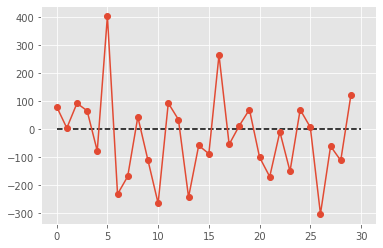

In [46]:
# Without Regularization, Higher value of Coefficients
plt.figure()
plt.plot([0,30], [0,0], 'k--')
plt.plot(l0.coef_.flatten(), 'o-')
plt.show()

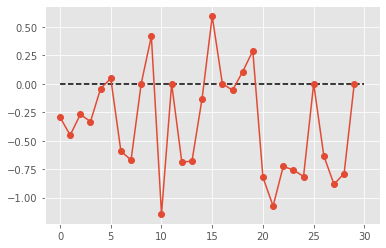

In [47]:
# L1 regularization makes many coefficients = 0
plt.figure()
plt.plot([0,30], [0,0], 'k--')
plt.plot(l1.coef_.flatten(), 'o-')
# plt.plot(l2.coef_.flatten())

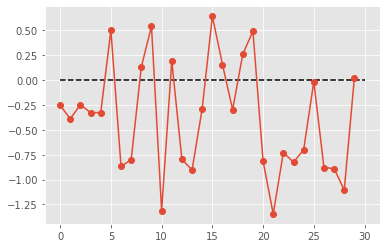

In [48]:
# L2 Regularization shrinks the coefficients 
plt.figure()
plt.plot([0,30], [0,0], 'k--')
plt.plot(l2.coef_.flatten(), 'o-')

### Too Much Regularization is also not Good 

In [49]:
digits= datasets.load_digits()
digits_data = digits.data
digits_target = digits.target
print(digits_data.shape, digits_target.shape)

(1797, 64) (1797,)


In [50]:
for i in range(0,10):
    print(sum(digits_target==i))

178
182
177
183
181
182
181
179
174
180


In [51]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_target, test_size=0.25, \
                                                    random_state=42, stratify=digits_target)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


In [52]:
C_list = [0.0001, 0.01, 0.1, 1, 10, 100, 1000]
train_err = []
test_err = []
train_acc = []
test_acc = []
coef = []

In [53]:
for C_value in C_list:
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    train_err.append(1 - lr.score(X_train,y_train))
    test_err.append(1- lr.score(X_test, y_test))
    train_acc.append(lr.score(X_train,y_train))
    test_acc.append(lr.score(X_test, y_test))
    coef.append(lr.coef_.flatten())

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

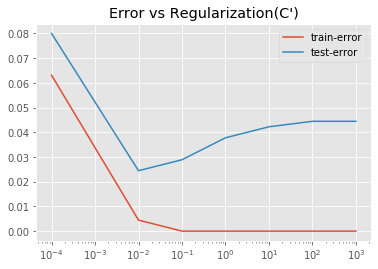

In [54]:
# Plot train and test error vs C values 
plt.semilogx(C_list, train_err, C_list, test_err)
plt.legend(('train-error', 'test-error'))
plt.title("Error vs Regularization(C')")
plt.show()
### C = less, Underfitting , C= high, Overfitting

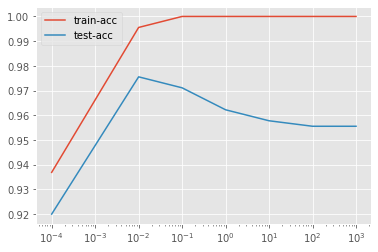

In [55]:
plt.figure()
plt.semilogx(C_list, train_acc, C_list, test_acc)
plt.legend(('train-acc', 'test-acc'))
plt.show()

## Feature Selection using L1 Regularization

In [56]:
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr2 = LogisticRegression()

In [57]:
from sklearn.model_selection import GridSearchCV

### Hyper-Parameter 'C' Tunning

In [58]:
searcher = GridSearchCV(lr, {'C': [0.001, 0.01, 0.1, 1 ,10, 100]})
searcher.fit(digits_data, digits_target)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
best_est = searcher.best_estimator_

In [60]:
print(searcher.best_params_)
print(searcher.best_score_)

{'C': 0.1}
0.9299025069637883


### Effect of L1 Regularization
1. Observe below results, many parameters become zero(more than half)
2. We can drop the features corresponding to these parameters, as they are of very little importance

In [61]:
print("Total no of parameters: {} ".format(best_est.coef_.size))
print("Reduced no of parameters: {} ".format(np.count_nonzero(best_est.coef_)))

Total no of parameters: 640 
Reduced no of parameters: 264 


In [62]:
pd.DataFrame(searcher.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037520,0.003603,0.000659,0.000020,0.001,{'C': 0.001},0.730556,0.697222,0.802228,0.754875,0.740947,0.745166,0.034294,6
1,0.063154,0.001674,0.000659,0.000027,0.01,{'C': 0.01},0.913889,0.883333,0.913649,0.935933,0.857939,0.900949,0.027250,5
2,0.140249,0.007937,0.000648,0.000011,0.1,{'C': 0.1},0.925000,0.900000,0.949861,0.963788,0.910864,0.929903,0.023779,1
3,0.403096,0.032831,0.000649,0.000015,1,{'C': 1},0.933333,0.886111,0.952646,0.961003,0.908078,0.928234,0.027844,2
4,1.262424,0.301588,0.000638,0.000029,10,{'C': 10},0.925000,0.875000,0.941504,0.949861,0.902507,0.918774,0.027212,3
5,1.514746,0.527496,0.000625,0.000025,100,{'C': 100},0.911111,0.866667,0.933148,0.955432,0.908078,0.914887,0.029540,4


In [63]:
best_est.score(X_test, y_test)

0.9866666666666667

In [64]:
coef[0].shape

(640,)

In [65]:
digits_data[0].shape

(64,)

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
score_list =[]
best_score = []

In [68]:
for c in C_list:
    lr = LogisticRegression(C=c, penalty='l1', solver='liblinear')
    score_list.append(cross_val_score(lr, digits_data, digits_target))
    best_score.append(np.mean(score_list[-1]))

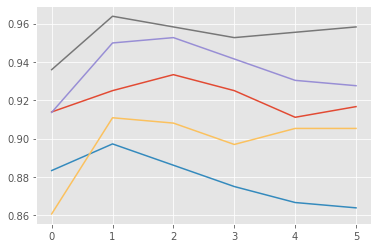

In [69]:
plt.figure()
plt.plot(score_list[1:])
plt.show()

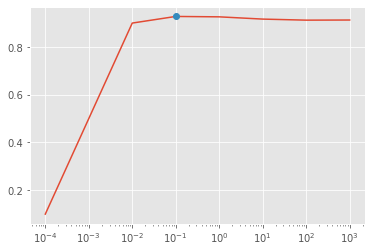

In [70]:
plt.figure()
plt.semilogx(C_list, best_score)
plt.semilogx([C_list[np.argmax(best_score)]], [np.max(best_score)], 'o')
plt.show()

In [71]:
np.argmax(best_score)
np.max(best_score)

0.9293469514082329

In [72]:
best_score

[0.09905292479108634,
 0.9015057257814918,
 0.9293469514082329,
 0.9276771897245434,
 0.918217270194986,
 0.9137728257505415,
 0.914328381306097]

In [73]:
score_list

[array([0.1       , 0.1       , 0.10027855, 0.09749304, 0.09749304]),
 array([0.91388889, 0.88333333, 0.91364903, 0.93593315, 0.86072423]),
 array([0.925     , 0.89722222, 0.94986072, 0.9637883 , 0.91086351]),
 array([0.93333333, 0.88611111, 0.95264624, 0.95821727, 0.90807799]),
 array([0.925     , 0.875     , 0.94150418, 0.95264624, 0.89693593]),
 array([0.91111111, 0.86666667, 0.93036212, 0.95543175, 0.90529248]),
 array([0.91666667, 0.86388889, 0.9275766 , 0.95821727, 0.90529248])]

## Regularization affects confidence
1. With Regularization, probabilites become close to 0.5 
    - RegZ ==> small parameters ==> raw_model_output ~ 0 ==> sigmoid(z) ~ 0.5

In [74]:
dummy_data = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])
dummy_label = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [75]:
lr = LogisticRegression(C=1) # Without Regularization
lrZ = LogisticRegression(C=0.1) # With Regularization

In [76]:
lr.fit(dummy_data, dummy_label)
lrZ.fit(dummy_data, dummy_label)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

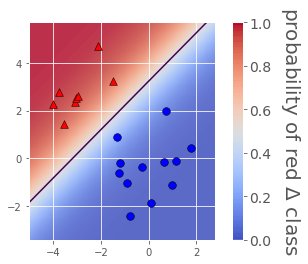

In [77]:
# C = 1
plot_classifier(dummy_data, dummy_label, lr, proba=True)

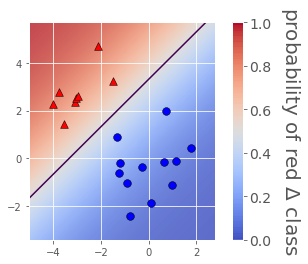

In [78]:
# C = 0.1 
plot_classifier(dummy_data, dummy_label, lrZ, proba=True)

### Observe the graphs
1. As you probably noticed, smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. That's quite a chain of events!
2. At x-axis we have feature-1 and y-axis we have feature-2
3. Observe the RED and BLUE portions have faded and less dark, which means there value is close to 0.5 

## Visualizing easy and difficult examples
1. Visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

In [79]:
def show_digit(i, X, y, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()

In [80]:
print(digits_data.shape, digits_target.shape)

(1797, 64) (1797,)


In [81]:
lr = LogisticRegression(solver='liblinear')
lr.fit(digits_data, digits_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

SyntaxError: invalid syntax (<ipython-input-82-3965194352eb>, line 1)

In [ ]:
probs = lr.predict_proba(digits_data)
print(probs.shape)

In [ ]:

sorted_indices = np.argsort( np.max(probs, axis=1))

In [ ]:
## Show the most confident (least ambiguous) digit 
show_digit(sorted_indices[-1], digits_data, digits_target, lr)

In [ ]:
## Show the least confident (most ambiguous) digit 
show_digit(sorted_indices[0], digits_data, digits_target, lr)

## Observer 2 digits
1. As you can see, the least confident example looks like a weird 4, and the most confident example looks like a very typical 0.

## Multi-class Classification 

### One vs Rest (OVR) Stratergy
1. Say we have 3 classes in our data set 
    - We will train 3 binary classifiers, one for each class 
        - `lr0.fit(X, y == 0)`: classify class 0 vs others
        - `lr1.fit(X, y == 1)`: classify class 1 vs others
        - `lr2.fit(X, y == 2)`: classify class 2 vs others
    - How Prediction will be done ? 
        - Compute the raw_model_output for 3 classifiers, predicted label = class corresponding to max of raw_model_output
        - Raw Model Ouput is also k/a Decision Function 
            - `lr0.decision_function(X)`
2. This is the default stratergy of Logistic Regression 
    - When we do `lr.fit(X,y)`, in background in fits num_classes binary classifiers as we explained
    
### Multinomial Stratergy
1. Instead of training several binary classifiers, we want to train only 1 classifier.
    - How to achieve ? 
        - `Change Loss function`
        - Default loss function can optimize accuracy for 2 classes only.
        - Can use loss function that directly tries to optimize accuracy for multi-class problem
            - Example loss function: `Multinomial Logistic regression loss, Softmax, Cross-entropy loss`

### Comparison btw OVR and Multinomial
1. OVR fits many classifer vs Multinomail fits 1 classifier 
2. OVR predicts for all & take max vs Multinomial predicts best class directly
3. Simple vs Complex
4. More Popular vs Less Popular
5. Not directly optimizing the accuracy vs Directly optimize the accuracy
    - `Due to above reason, in some cases Multinomial has high accuracy`
6. No of paramters will be same for both classes and have same interpretation

### Parameters/ Coefficients 
1. Say we have 10 features
2. Binary Classifier 
    - 10 parameters, one for each features, 1 paramter for intercept 
3. Multi-class 
    - Say we have 3 classes 
    - 1 paramter per feature per class and 1 intercept per class 
    - Total 30 paramters for features, 3 parameter for intercept 
    - No. of paramters will be same for both approaches 
    - OVR
        - If we fit 3 classifier then for each classifier, we will have 10 parameters for corresponding features and 1 parameter for intercept.
    - Multinomial
        - Same no. of features but HOW ?

### Code 

1. Arguements of Logistic Regression function
    - OVR 
        - `multi_class='ovr'`
        - `solver='liblinear'`
    - Multinomial
       - `multi_class='multinomial'`
       - `solver='liblinear'`
    - **solver arguement specifies the algorithm used for minimizing the loss function**

In [ ]:
## Iris data have 3 classes 
X,y = iris_data, iris_target
print(X.shape, y.shape)

In [ ]:
# 3 classes
set(y)

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

### One vs Rest Stratergy

In [ ]:
lr0= LogisticRegression(multi_class='ovr', solver='liblinear')
lr1=LogisticRegression(multi_class='ovr', solver='liblinear')
lr2=LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
lr0.fit(X_train, y_train==0)
lr1.fit(X_train, y_train==1)
lr2.fit(X_train, y_train==2)

In [ ]:
# PREDICTION FOR A TEST CASE : Max of raw_model_output/decision_function
print(lr0.decision_function(X_test)[0])
print(lr1.decision_function(X_test)[0])
print(lr2.decision_function(X_test)[0])
print('Actual_class: ', y_test[0])

#### 1. The class for this test case = 0. Raw Model ouput is highest for class 0
#### 2. In Background default logistic regression follows the same stratergy as done in above example

In [ ]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
lr.fit(X_train, y_train)

In [ ]:
print('Raw-model-output: ', lr.decision_function(X_test)[0])
print('predicted class: ', lr.predict(X_test)[0])

In [ ]:
print('Training Accuracy: ', lr.score(X_train, y_train))
print('Testing Accuracy: ', lr.score(X_test, y_test))

In [ ]:
## Coefficients 
print('No of coefficients: ', lr.coef_.shape)
print('No of intercepts: ', lr.intercept_.shape)

### Multinomial Stratergy

In [ ]:
lrM = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lrM.fit(X_train, y_train)

In [ ]:
print('Raw-model-output: ', lrM.decision_function(X_test)[0])
print('predicted class: ', lrM.predict(X_test)[0])

In [ ]:
print('Training Accuracy: ', lrM.score(X_train, y_train))
print('Testing Accuracy: ', lrM.score(X_test, y_test))

In [ ]:
## Coefficients 
print('No of coefficients: ', lrM.coef_.shape)
print('No of intercepts: ', lrM.intercept_.shape)

### Observer following
1. Multinomial has high accuracy than OVR
2. Coefficients are of same size in both

### Visualizing Mult-class classification

In [ ]:
dummy_data = np.array([[-2.83895657e-01, -9.51457706e-01], [ 5.33624372e-01,  1.23918071e+00], [-1.17337815e+00, -1.21258188e-01], [-1.19338379e+00,  7.97747166e-01], [-3.74902201e-01, -3.99647889e-01], [-1.11678880e+00, -3.63057976e-01], [ 3.92567929e-02, -1.03949311e+00], [-4.60496902e-01,  7.92206150e-01], [ 3.73372234e-01,  4.49455588e-01], [-5.68303256e-01, -1.12326024e+00], [-8.10825377e-01, -6.71197010e-01], [-2.23456895e-01,  5.01300063e-01], [ 3.31395128e-01, -8.81087488e-01], [ 1.23187925e+00,  6.36307263e-01], [-1.19438566e-01, -1.70031450e+00], [-3.56432381e-01,  8.17597947e-01], [ 3.68396844e-01, -4.89405078e-01], [-2.55373639e-01, -4.18075333e-01], [-1.32645347e+00,  1.04344987e+00], [-5.92850474e-01, -8.01421997e-01], [ 7.27961902e-01, -1.12489821e+00], [-2.13511481e+00,  1.53256634e+00], [ 2.30542073e-01, -8.68803803e-01], [ 1.09813977e+00,  5.83409537e-01], [ 8.38336530e-01,  6.17109567e-01], [ 4.86438237e-01,  3.06669383e-01], [ 7.86915440e-01,  4.44667097e-01], [-4.78932579e-01, -5.66539851e-01], [-2.03300554e-01,  9.36879327e-01], [ 3.39165831e-01,  8.12534012e-01], [-3.61733276e-01,  3.63540549e-01], [ 1.18603363e+00, -2.01359716e+00], [-4.87253757e-01, -6.37446081e-01], [-1.88698497e-01, -5.82874621e-01], [ 9.81411621e-01,  1.33941738e+00], [ 1.50189299e+00,  1.03081206e+00], [-6.44426536e-02, -3.81126339e-01], [ 1.28839740e+00,  1.54321683e+00], [-9.02379254e-01,  2.12912925e-01], [-2.75943790e-01,  6.62190410e-01], [ 1.85875489e-04, -2.22687852e+00], [-1.36218486e-01, -6.12143582e-01], [-8.01189309e-01, -7.31571602e-01], [-1.31114360e+00, -1.11160107e-01], [-1.82715882e-01,  3.45742341e-01], [ 1.62577984e+00,  9.82365559e-02], [ 1.18754221e+00, -9.88047256e-01], [ 3.30896348e-01,  1.74147081e+00], [ 1.06319463e+00,  7.25707477e-01], [-6.31172777e-02,  5.03138338e-01], [ 3.70221639e-01,  1.27315366e+00], [-3.14443989e-03, -2.64384583e-01], [ 3.57484301e-01, -2.27657772e-02], [-7.10889392e-01,  1.54688358e+00], [ 7.62329973e-01,  1.33254405e+00], [-1.55233553e+00, -1.52337441e+00], [-1.00339689e+00,  2.11862140e+00], [ 7.22823193e-01,  3.35405706e-01], [ 9.12755253e-02, -5.04468641e-01], [ 4.95114934e-02, -2.44690106e-01], [-1.40309968e+00, -5.12395416e-01], [-7.75501690e-01, -6.02394114e-01], [ 1.24435378e+00,  1.05314888e+00], [-2.23130848e-02,  1.87403279e+00], [-2.22779816e+00,  1.27046867e+00], [ 4.42928990e-02,  5.97549446e-01], [ 1.14098613e+00,  8.51490630e-01], [ 1.44165046e+00, -8.66600209e-01], [ 1.32295140e-01,  1.62653413e+00], [ 3.69308441e-02,  1.67786453e+00], [-6.12975983e-01, -1.35405850e+00], [ 8.22080441e-01, -7.45448227e-01], [-1.03015455e+00,  1.57828451e+00], [-1.27392825e+00, -1.19848757e-01], [-4.22882508e-01, -3.05961769e-01], [ 1.05127378e+00, -2.29052289e+00], [-7.89554501e-01,  8.57037168e-04], [ 3.73018740e-01, -4.98468373e-01], [-7.21550677e-01, -5.22821271e-01], [ 1.91021707e+00, -1.52700869e+00], [ 6.18671454e-01,  5.31270233e-01], [-1.12104559e+00,  2.87688027e+00], [ 1.21061741e+00, -5.48616370e-01], [-1.25680616e+00, -6.13281706e-02], [-1.50756706e+00,  4.18340765e-01], [ 7.11133123e-01, -7.15113895e-01], [-4.22620092e-01,  5.79287166e-01], [-9.34751978e-01,  3.60387487e-02], [ 1.21135650e+00, -5.78726752e-01], [-1.15320171e+00, -4.85969087e-02], [ 2.62171741e+00,  7.01010427e-01], [-1.48673284e-02, -9.33967286e-01], [-4.71193685e-01,  1.48297028e-01], [ 2.19748594e+00,  8.18579786e-02], [ 8.95326539e-01, -8.20358903e-01], [-6.17111080e-01,  1.27571264e+00], [ 1.09948335e+00, -1.26033634e+00], [-2.59602194e-01,  7.62758510e-01], [ 8.26861357e-01, -8.98524452e-01], [ 1.17328060e+00, -2.02972829e-01], [ 9.44652675e-02,  1.11263639e+00], [ 7.93685036e-02,  2.91707420e-01], [ 8.55134983e-01, -1.86820269e+00], [-3.33377592e-02, -8.21471683e-01], [ 1.08195801e+00, -9.12742251e-01], [-9.59114991e-01, -9.32883669e-01], [-1.09944058e-01,  4.29168341e-01], [ 8.47500557e-01,  2.00541178e-01], [ 8.97969301e-01, -1.34475096e+00], [-7.45549265e-01,  3.38558393e+00], [-2.35167941e-01,  1.16971717e-01], [ 3.82228847e-01, -1.89098191e+00], [ 4.46548315e-01, -1.90550205e-01], [ 1.03125402e+00, -6.10175894e-01], [ 8.98533636e-01, -8.27191628e-01], [-1.33555205e+00, -8.75184223e-01], [-3.82730422e-01,  1.30044462e+00], [ 7.03771022e-02,  3.63324429e-01], [-3.82547777e-01, -1.33433884e-02], [-9.28831114e-01, -1.24595217e-01], [-4.18020419e-01,  4.48693923e-02], [-1.14297594e+00, -4.20076628e-01], [-1.34085140e+00, -1.04693788e+00], [-5.75321695e-01, -1.87324354e+00], [ 1.05179314e+00,  1.50698744e-01], [-2.41168156e-01, -4.36437276e-01], [ 1.46929860e+00, -9.03666003e-01], [ 2.39422640e-01, -2.90113812e-01], [ 4.08505448e-01,  4.27716109e-01], [ 1.03080433e+00, -1.54913404e-03], [-1.02676711e+00,  7.21155407e-01], [ 1.24298760e+00,  6.05352492e-01], [ 9.98158704e-02,  7.85882456e-01], [-3.30989273e-01,  1.87923919e-01], [ 1.46427195e-01, -7.74987386e-01], [ 6.27556539e-01,  2.16992322e+00], [ 1.91133871e-01,  1.70918433e+00], [-3.87055670e-01, -1.23621603e+00], [ 1.30466697e+00,  1.89116566e-01], [-1.00664113e+00, -1.82069688e+00], [ 2.04048554e-01,  1.18707347e+00], [-1.30907152e+00,  5.66034777e-02], [ 3.40083444e-01, -9.90222332e-01], [ 2.13573178e-01, -2.94037076e+00], [-2.36084944e-02, -2.27832455e+00], [ 9.22675071e-01,  2.14198658e+00], [-8.85698364e-01, -1.82381255e+00], [-1.55801959e+00,  7.58114660e-01], [ 1.48191669e+00, -7.29229056e-01], [ 3.45873152e+00,  3.45013732e-01], [-3.87080518e-01,  1.11669888e+00], [ 4.38763001e-01,  6.12595812e-01], [ 6.72911640e-01,  1.14420429e+00], [ 8.93632281e-01,  3.54641572e-01], [-6.90807494e-01, -4.59634838e-01], [-4.15753108e-01,  2.07834911e+00], [ 4.17739748e-01,  1.15217233e+00], [-6.49536218e-01, -1.29778992e+00], [ 8.79936159e-01, -1.17037420e+00], [ 1.32963509e+00,  7.77819970e-01], [ 1.67576848e+00,  3.71978129e-01], [-1.00808260e+00,  2.57843572e-01], [ 1.53015384e+00,  2.27643840e-01], [-6.18754318e-01, -6.41954617e-01], [-8.71107452e-01,  3.11477892e-01], [ 6.37622987e-01,  2.03146691e+00], [-3.10980526e-01, -1.79036690e-01], [-6.45468284e-01, -1.25491015e+00], [ 4.71158947e-01, -2.39641054e+00], [-6.47038417e-01,  7.45740049e-01], [ 1.11893355e-01,  9.23820401e-02], [ 2.46226478e-01,  3.13062906e-01], [-1.01089039e-01,  3.62849379e-02], [ 1.71659568e-01, -1.35927630e+00], [ 3.40480960e-01,  1.16674832e+00], [-2.56618477e-01,  2.08152722e+00], [ 1.53315515e+00,  2.88728123e-01], [-5.31455590e-01,  4.13138729e-01], [ 1.39559634e+00,  1.21110653e-01], [-2.21472479e-01,  5.40642292e-01], [-4.96250861e-01, -3.33320300e-01], [ 6.16439064e-01, -1.03542338e+00], [-3.12897613e+00,  4.76362013e-01], [-6.99437789e-01, -1.75830724e-01], [ 1.71519587e+00,  1.01602638e-01], [ 5.19186062e-01, -1.35492173e+00], [ 6.82204596e-01,  8.73433968e-01], [-1.08581585e+00,  1.75168166e-01], [-4.22907282e-01, -5.65107061e-01], [-3.71555929e-01, -1.42305714e+00], [-8.21577003e-01,  5.28010495e-01], [ 7.86870071e-02,  9.24843550e-02], [-2.16193119e-01,  5.86193381e-01], [-1.22548359e+00,  2.48846802e-01], [-1.55000064e+00,  1.56518980e+00], [-9.60286755e-01, -3.40835920e-01], [-1.21420118e+00, -3.54183421e-01], [-6.17941477e-01,  8.49677284e-02], [-1.26821697e+00,  1.53634503e+00], [-1.04121511e-01, -3.09345590e-01], [-3.24089313e-01,  9.14684501e-02], [-3.46051731e-01,  2.71948412e-01], [ 5.49168052e-01, -7.03300534e-02], [-6.29554699e-02, -8.28104012e-02], [-1.66552903e-01, -6.81026187e-01], [-1.86519153e+00, -8.10162292e-01], [ 5.66593537e-02, -4.18745854e-01], [ 2.34711021e+00, -3.27882927e-02], [ 6.42344993e-01,  4.65635453e-01], [ 8.19580983e-01, -1.38034832e+00], [-1.27525615e+00,  1.62592404e+00], [ 4.18990622e-01, -2.34217819e-01], [-6.45499218e-01, -1.68068271e-01], [ 5.87115685e-01,  1.26968048e+00], [-1.38994421e+00, -3.17576787e-01], [ 1.33279793e+00,  5.91125442e-01], [-1.14989342e+00, -6.18127175e-01], [-4.78690715e-01, -1.60450115e+00], [ 1.54541507e+00,  1.55276018e-01], [ 7.28423987e-01, -3.30380155e-01], [-1.07899557e+00,  9.56753137e-01], [ 1.73158536e+00, -1.45930768e+00], [-8.50859191e-01,  9.46701140e-01], [ 6.85189932e-01, -5.03068765e-01], [ 6.67027648e-01,  6.86137104e-01], [ 2.52037478e+00,  6.25413897e-01], [ 1.23372005e+00,  2.51603284e-01], [ 5.81184053e-02,  4.51137245e-02], [-2.01775288e-01, -8.08414669e-01], [-2.83241465e+00,  7.23569524e-01], [ 1.11794340e+00,  2.66169426e-01], [-1.48414526e+00,  1.41802404e+00], [-2.17997557e-01, -4.27031273e-01], [ 1.05131170e+00,  1.03823987e+00], [ 4.73478589e-01,  2.22850843e+00], [ 3.79073150e-01, -4.04320588e-01], [-4.85248870e-01, -4.63422678e-01], [-6.52513292e-01, -8.00667406e-02], [-1.10638994e-01, -9.52893744e-02], [ 9.72278149e-01, -6.81695817e-01], [-5.74704425e-01,  5.46743761e-01], [ 2.61211937e-01, -9.00517980e-02], [-3.13766608e-01,  2.99858742e-01], [-7.53824274e-01, -3.62056163e-01], [-8.57537689e-01,  2.70991980e+00], [ 1.17612860e-01,  8.06824976e-01], [ 5.63697109e-01,  6.45696112e-01], [-1.43600626e+00,  5.59475465e-01], [-6.51804104e-01, -6.72113868e-01], [ 7.44253455e-01,  5.70717760e-01], [-5.96343760e-01, -1.18964250e+00], [ 5.96500258e-01,  2.00513480e+00], [ 9.46339546e-01,  8.25057696e-01], [-9.49552255e-01, -2.12707718e+00], [ 7.77784328e-01,  4.12740359e-01], [-2.14872339e-02, -3.21881539e-01], [ 4.64142337e-01,  4.71265171e-01], [-1.00162254e+00,  5.59504404e-02], [ 4.22650852e-01,  7.07834832e-01], [-4.19091926e-01,  4.21446505e-04], [ 3.80532136e-01, -8.62496826e-01], [-6.88095193e-01,  3.83724014e-03], [-1.38296737e+00,  1.01773102e+00], [-1.56727614e-01, -1.00625917e-01], [-7.02790559e-01, -5.34264482e-01], [ 4.53674228e-01,  2.26399723e-01], [-3.70977024e-01, -9.02532647e-01], [ 9.95739869e-01, -4.29823772e-01], [ 3.21633047e-01, -4.81996737e-01], [-3.59761073e-01, -5.19486660e-01], [ 2.63949169e-01,  2.54547095e+00], [ 4.00202410e-01,  2.16159036e+00], [ 8.54602127e-01, -1.08544729e+00], [ 1.17409647e-01,  6.72164886e-03], [-2.96916269e+00, -7.24299000e-01], [ 8.98734164e-01,  2.03360105e+00], [ 9.14885199e-01,  2.08795727e+00], [ 3.52225950e-01,  1.11807396e-01], [-5.02642449e-01, -8.94881511e-01], [-2.07926031e-01, -2.26007844e-01], [-2.98067495e-01,  1.21007972e+00], [ 5.59552710e-01,  6.16856924e-01], [-2.13331328e-01, -1.37176907e+00], [-7.71592298e-01,  2.56522853e-01], [-8.91009324e-02,  5.85928029e-01], [-6.59158060e-01,  8.93140184e-01], [-1.66256529e-01, -9.80095936e-01], [-1.45293634e+00, -6.79306038e-01], [ 2.58459533e-01, -1.59507701e+00], [-6.16562642e-01,  3.37553869e-01], [ 1.99332380e+00,  3.76100676e-01], [ 1.31749904e+00,  1.14525370e+00], [ 6.77627652e-01, -2.69028412e+00], [-7.24054641e-01, -3.00028828e-01], [-2.15908250e-01,  1.73361026e+00], [-4.26627903e-01,  3.95005345e-02], [ 1.13473732e+00, -2.06468477e-01], [ 1.56815803e+00, -1.47455508e-01], [ 7.86715120e-01, -2.32062876e-01], [ 9.87933166e-01,  1.60843618e-01], [ 1.90729163e+00,  1.27409312e-01], [ 3.59355853e-01, -1.04640821e+00], [-9.46647182e-01,  6.22098825e-01], [-2.46689280e-01,  2.57307271e-01], [ 2.67800451e-01,  4.40998924e-01], [-1.83371684e+00, -1.07635433e+00], [-7.32318763e-02,  1.25985823e+00], [ 6.97274340e-01, -4.56201361e-01], [ 9.15469974e-02,  3.47279873e-01], [-1.34215495e-01,  1.53634006e+00], [-2.01959589e-01,  7.40056156e-01], [ 1.29536211e+00, -1.79185232e+00], [ 6.35987451e-01,  1.34724258e-02], [-7.52186057e-02,  2.37048909e-01], [-7.38858807e-01,  4.31069515e-03], [ 2.76485783e+00, -1.04532813e+00], [-8.28286409e-01,  4.96139031e-01], [ 6.72941893e-01, -3.08256204e-01], [ 3.56320956e-01, -1.71854210e-01], [-1.83052452e-01,  9.93778673e-01], [ 6.07162324e-01, -4.87940009e-01], [-1.45724708e+00, -5.57288015e-01], [-1.95713287e-02, -7.27061061e-01], [-3.03595807e-01,  2.45310326e-01], [ 4.25748084e-01, -2.73044964e-01], [ 1.28042925e+00, -2.17265698e+00], [ 1.13616284e+00, -7.01750647e-01], [-5.15620443e-01,  4.27429863e-01], [ 1.17568017e+00, -1.09936359e-01], [-1.36411847e+00, -3.62075361e-02], [-3.03338789e-01,  2.32516450e+00], [ 4.21265199e-01, -1.48184608e+00], [-1.56356664e+00,  2.43979829e-01], [-1.89370094e+00, -1.34857851e+00], [-1.81369673e+00, -1.04035943e+00], [-1.30487016e+00, -6.09707799e-02], [-3.87350229e-01, -1.20156767e+00], [ 1.85116618e+00, -2.47765287e-02], [ 2.55609131e-01,  4.43817616e-01], [-7.23423000e-01,  6.87936650e-01], [ 7.19675853e-01,  1.63807539e+00], [ 4.07528586e-01, -4.57875958e-01], [ 1.27239160e+00,  7.54197611e-01], [-7.33084811e-01, -1.22625870e+00], [-1.00146686e+00,  8.22587011e-01], [ 8.74280306e-01, -4.28087542e-02], [-2.60254075e+00, -1.04374295e-01], [ 2.47129653e-01, -2.39347095e-01], [-1.32192531e+00, -2.47002839e-01], [-1.50342772e+00,  8.14205321e-01], [ 1.31894693e+00, -7.79305377e-01], [ 1.07114856e+00,  5.61995551e-01], [-9.48056016e-01,  4.62884142e-01], [-1.47049629e+00, -3.10810395e-01], [-1.52246111e+00, -1.50083105e+00], [ 6.62394356e-01,  2.32762068e-01], [-1.77646954e+00,  1.80796912e+00], [-1.33919576e+00,  4.00842900e-01], [ 4.55071208e-01, -8.87571298e-01], [-9.27020245e-03, -1.02678468e+00], [ 7.87715149e-01, -4.74965423e-01], [-6.80287514e-01,  7.01827786e-01], [ 2.34664160e-01,  1.02683424e+00], [ 8.36586885e-03, -2.05581122e-01], [ 1.87547736e+00,  8.75869903e-01], [-3.47955037e-01,  1.95290688e+00], [-7.67038989e-01,  9.10960121e-02], [ 2.63033753e-01,  4.72970318e-01], [ 3.09943712e-02,  1.95394133e+00], [-1.13433110e+00, -1.95408174e+00], [-9.01631724e-02, -3.38637356e-01], [ 1.10103317e-01,  1.61216978e+00], [ 1.49961133e+00,  2.21729968e-01], [-1.18243595e+00,  9.17843166e-01], [-1.15438675e+00, -1.19451959e+00], [-1.96908372e+00,  1.61768855e+00], [ 1.04567355e+00,  1.07875346e+00], [ 7.72705301e-01,  9.98823749e-01], [-1.35997652e+00, -4.98768895e-01], [-9.04834584e-01,  2.33921986e-01], [-4.95178016e-01, -4.39195245e-02], [-5.93938849e-01,  1.42820254e+00], [ 5.59304094e-01, -1.15873862e+00], [ 2.16040528e-01, -8.17380088e-02], [ 1.91528001e-01, -1.69325925e+00], [ 1.10434170e+00,  2.84340339e-01], [-1.09580513e+00,  5.86898099e-01], [ 6.32328497e-01, -5.91375311e-01], [ 2.03614132e+00, -3.90471672e-01], [ 5.38816211e-01,  1.25914174e+00], [ 1.03704347e+00, -2.23606708e-01], [ 1.19372766e+00, -1.14210183e+00], [ 1.51355134e+00, -5.83971183e-01], [-1.07182512e+00, -6.52605083e-01], [-4.77214399e-02,  5.16168230e-01], [-7.41155815e-01, -2.03127300e-01], [-5.26219209e-01,  9.80301155e-01], [-1.72741909e+00, -1.65621733e-01], [ 6.08561524e-01, -1.45370511e-01], [ 2.68417609e-01,  4.10423630e-01], [ 3.35639118e+00, -1.76397176e-01], [ 7.24257981e-01, -3.60339382e-01], [ 1.06875286e-01, -1.85461448e-01], [-2.17547662e+00,  1.31572316e+00], [ 7.05906132e-01, -2.16529995e-03], [-1.37692376e+00, -2.09079539e+00], [ 2.46229942e-01, -1.12744334e+00], [ 8.02523744e-01,  7.75491394e-02], [ 1.91706758e+00,  1.43183414e+00], [ 3.73242087e-01, -2.27227927e+00], [-1.44161294e+00, -9.97108872e-01], [-5.28857450e-01, -1.87424747e+00], [ 1.43258736e+00, -3.37113081e-02], [ 2.07234655e-01, -3.09076870e-01], [ 3.90215099e-01,  8.72054171e-01], [ 7.45161918e-01, -1.87417848e+00], [-8.99287804e-01,  4.02730489e-01], [-4.91389477e-01,  3.07685767e-01], [-5.11938656e-01,  1.47585371e+00], [ 1.52300602e+00,  2.58514757e-01], [ 4.24973478e-02,  2.57461361e-01], [-9.04075115e-01,  9.96421859e-01], [-2.10108887e-01,  4.44708778e-02], [ 1.03676621e+00, -8.92949123e-01], [ 4.53475954e-01, -8.41371282e-02], [ 1.27061789e+00, -1.67840458e-01], [-2.80065465e-01, -2.03211468e+00], [-2.30813912e+00, -1.29304958e+00], [-7.74356188e-01,  3.19574013e-01], [ 1.87887312e-01, -2.45362957e-01], [-4.72937053e-01, -1.27600645e+00], [ 1.22272244e+00,  2.87961812e-01], [-1.47938168e+00,  4.78233386e-01], [ 3.44089778e-01,  9.24369569e-01], [-1.47820336e-01,  1.78836253e-01], [-2.61313086e+00,  7.06282124e-01], [ 2.06035418e+00,  1.21243436e+00], [-9.60549064e-01, -2.29243260e+00], [ 4.33027171e-01,  1.16868694e+00], [ 9.03617320e-01, -9.07428912e-01], [-4.29349702e-01,  2.08682098e-01], [ 1.18723781e+00,  9.60222494e-01], [ 8.70232033e-01, -7.31800954e-01], [-8.39153310e-01,  4.25780276e-01], [ 9.10585432e-01,  4.83166022e-01], [-1.42955178e-01, -3.48926918e-01], [-1.76109418e+00, -5.47684733e-01], [ 7.12915565e-01, -1.20512064e+00], [ 1.99865471e+00,  1.11107025e+00], [ 6.08398173e-01,  6.44423717e-02], [-3.15608408e-01,  2.14631103e-01], [-1.05242232e+00, -3.29021132e-01], [ 1.71535143e-01,  1.58322635e+00], [-6.35773050e-01, -1.56803626e+00], [-8.89829669e-01, -1.39746713e+00], [-5.07586883e-01,  1.22201642e+00], [-1.61711936e+00, -1.47048434e+00], [-9.29768710e-02, -1.75262884e+00], [ 3.69138690e-01,  8.05857912e-01], [ 2.94671774e-01,  5.80944613e-01], [ 3.70936983e-01, -9.85710205e-02], [-9.25708081e-01, -7.22894280e-01], [-1.11548831e+00, -9.57694317e-01], [-1.18669763e+00, -7.42497045e-01], [-2.24840754e-01, -5.93059064e-02], [-6.41667586e-01,  5.37284099e-01], [ 2.37396532e-01, -5.76700064e-01], [ 2.54272550e+00, -1.63058088e+00], [-8.87373181e-01,  1.95202568e-02], [ 3.84847607e-01, -7.51008417e-01], [-1.46282978e+00,  3.08199826e-01], [-3.66702316e-01, -2.23582305e+00], [ 6.43664449e-01, -8.32684408e-01], [-2.04183218e+00,  4.87795183e-01], [ 1.13515625e+00, -9.85409189e-01], [ 1.28410505e+00,  1.43881405e+00], [ 5.85979267e-01,  7.46602215e-01], [-6.93376209e-01, -8.44376740e-01], [ 1.45451916e+00,  1.05476312e-01], [ 2.38609334e-01, -4.31543600e-02], [-5.12863852e-01, -1.35550194e+00], [-1.24472169e+00,  1.62495117e-01], [-2.12720688e-01,  4.06861023e-01], [ 3.63530110e-01,  1.25938338e+00], [ 1.10058109e+00,  9.84706123e-01], [-5.35740682e-01, -1.74105144e+00], [ 5.35714841e-01,  5.41693020e-01], [-9.70468122e-01,  1.14890818e+00], [-1.09988936e+00, -4.78052396e-01], [ 1.27920406e+00, -8.08848981e-01], [-1.36798424e+00,  3.99855057e-01], [ 1.01065618e+00, -2.62314558e-01], [ 1.34576187e+00, -4.47251284e-01], [-3.68049070e-01, -3.43437389e-01], [-4.96020550e-01, -4.62734100e-01], [-1.24062149e+00, -2.13638805e+00], [-5.52547887e-01, -1.10351078e+00], [ 8.85081661e-01,  4.38362730e-01], [ 9.43883760e-01,  1.26227065e-02], [-4.29917047e-02,  7.78520148e-01]])

In [ ]:
dummy_label = np.array([4, 2, 4, 1, 4, 4, 4, 1, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 1, 4, 3, 1,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 3, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 3, 3, 2, 2, 2, 2, 4, 4, 5, 2, 4, 5, 2, 4, 4, 4, 4, 2, 2, 1, 2,
       2, 3, 2, 2, 4, 3, 5, 4, 4, 3, 4, 4, 4, 3, 2, 5, 3, 4, 4, 3, 4, 4,
       3, 4, 3, 4, 4, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 4, 3, 4, 2, 2, 3, 5,
       4, 3, 4, 3, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 2, 3, 4, 2,
       2, 4, 4, 2, 2, 4, 3, 4, 2, 4, 4, 3, 4, 2, 4, 4, 3, 3, 2, 2, 2, 2,
       4, 5, 2, 4, 3, 2, 3, 4, 3, 4, 4, 2, 4, 4, 3, 1, 4, 2, 4, 4, 2, 5,
       3, 4, 3, 2, 4, 3, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 2, 4, 1, 4, 4, 4,
       1, 4, 4, 4, 2, 4, 4, 4, 4, 3, 2, 3, 5, 4, 4, 2, 4, 2, 4, 4, 3, 3,
       1, 3, 1, 3, 2, 3, 2, 4, 4, 4, 2, 1, 4, 2, 2, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 5, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 1, 4,
       4, 2, 4, 3, 4, 4, 2, 2, 3, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 1,
       4, 4, 4, 4, 3, 2, 3, 4, 2, 4, 3, 3, 3, 2, 3, 4, 4, 4, 2, 4, 2, 3,
       2, 2, 2, 3, 2, 4, 4, 3, 4, 3, 4, 2, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4,
       5, 4, 4, 4, 4, 4, 4, 3, 2, 4, 2, 4, 2, 4, 1, 2, 4, 4, 4, 4, 3, 2,
       4, 4, 4, 2, 5, 4, 4, 4, 3, 4, 2, 4, 2, 5, 4, 2, 2, 4, 4, 2, 3, 1,
       4, 1, 2, 2, 4, 4, 4, 5, 3, 4, 4, 2, 4, 3, 3, 2, 3, 3, 3, 4, 2, 4,
       1, 4, 2, 2, 3, 3, 4, 1, 2, 4, 4, 2, 2, 3, 4, 4, 3, 4, 2, 3, 4, 4,
       5, 3, 4, 1, 4, 3, 2, 3, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 3,
       4, 2, 3, 4, 2, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 1, 4, 4, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 2, 2, 4, 3, 4, 4, 4, 4, 2,
       2, 4, 2, 1, 4, 3, 4, 3, 3, 4, 4, 4, 4, 2, 2, 2])

In [ ]:
print(dummy_data.shape, dummy_label.shape)

In [ ]:
## EDA : Here it is hard for a linear classifier to classify yellow class
plt.figure()
plt.scatter(dummy_data[:,0], dummy_data[:,1], c=1-dummy_label)
plt.show()

In [ ]:
## OVR stratergy
lr = LogisticRegression(C=100, multi_class='ovr', solver='liblinear')
lr.fit(dummy_data, dummy_label)

In [ ]:
plot_classifier(dummy_data, dummy_label, lr)

### Observe
1. OVR, never predicts the Dark-blue class
2. Multinomial predicts every class 

In [ ]:
## Multinomial Stratergy
lrM = LogisticRegression(C=100, multi_class='multinomial', solver='lbfgs')
lrM.fit(dummy_data, dummy_label)

In [ ]:
plot_classifier(dummy_data, dummy_label, lrM)

In [ ]:
theta1 = lr.coef_[:,0]
theta2 = lr.coef_[:,1]
theta0 = lr.intercept_

#### OVR has very bad classifier for class = 1, as show below
#### Reason for not classifying dark blue class 

In [ ]:
plt.figure()
plt.scatter(dummy_data[:,0], dummy_data[:,1], c=(dummy_label==1))
x = np.linspace(-4, 4, 100)
plt.plot(x, (theta1[0]*x+ theta0[0])*(-1/theta2[0]))
# plt.plot(x, (theta1[1]*x+ theta0[1])*(-1/theta2[1]))
# plt.plot(x, (theta1[2]*x+ theta0[2])*(-1/theta2[2]))
# plt.plot(x, (theta1[3]*x+ theta0[3])*(-1/theta2[3]))
# plt.plot(x, (theta1[4]*x+ theta0[4])*(-1/theta2[4]))
plt.show()

In [ ]:
# Bad Binary Classifier for class = 1
lr_class_1 = LogisticRegression(C=100, multi_class='ovr', solver='liblinear')
lr_class_1.fit(dummy_data, dummy_label==1)
plot_classifier(dummy_data, dummy_label==1, lr_class_1)

In [ ]:
theta1 = lrM.coef_[:,0]
theta2 = lrM.coef_[:,1]
theta0 = lrM.intercept_

In [ ]:
plt.figure()
plt.scatter(dummy_data[:,0], dummy_data[:,1], c=(dummy_label))
x = np.linspace(-4, 4, 100)
plt.plot(x, (theta1[0]*x+ theta0[0])*(-1/theta2[0]))
# plt.plot(x, (theta1[1]*x+ theta0[1])*(-1/theta2[1]))
# plt.plot(x, (theta1[2]*x+ theta0[2])*(-1/theta2[2]))
# plt.plot(x, (theta1[3]*x+ theta0[3])*(-1/theta2[3]))
# plt.plot(x, (theta1[4]*x+ theta0[4])*(-1/theta2[4]))
plt.show()

## See How Non linear SVM behaves with this data

In [ ]:
svc = SVC()
svc.fit(dummy_data, dummy_label)

In [ ]:
plot_classifier(dummy_data, dummy_label, svc)

In [ ]:
svm_class_1 = SVC()
svm_class_1.fit(dummy_data, dummy_label==1)
plot_classifier(dummy_data, dummy_label==1, svm_class_1)

## The non-linear SVM works fine with one-vs-rest on this dataset because it learns to "surround" class 1.
1. For this data, it was hard to fit a line to classify the Dark-blue class, that's why non-linear classifier works best here.